Dataset Summary for Oil Price Forecasting Project
📊 Dataset Overview
Type: Time-series financial data (daily prices)

Time Coverage: 2000-2022 (example range)

Commodities: Brent Crude, WTI Crude, Natural Gas, Heating Oil

Records: ~22,900 daily entries (example count)

📂 Key Features
Price Data (USD/barrel):

Open, High, Low, Close prices

Daily trading Volume

Engineered Features:

Technical Indicators (SMA7, EMA14, RSI14)

Volatility Measures (30-day rolling std dev)

Temporal Features (Day-of-week, Month)

Metadata:

Currency: USD (all prices)

Trading Days Only (excludes weekends/holidays)

⚙️ Data Processing
Handled Missing Values: Time-based interpolation

Outlier Treatment: Winsorization (capping extreme values)

Normalization: MinMax scaling for ML models

Stationarity: Differencing for time-series models

🔍 Data Characteristics
Non-Stationary: Prices show clear trends/seasonality

High Volatility Periods: Visible during market crises

Strong Correlations: Between different oil types (Brent/WTI)

🌐 Data Sources
Primary: Yahoo Finance API/CSV exports

Secondary: FRED Economic Data (for macro indicators)

In [4]:
import pandas as pd
import os

# Define the base directory
base_dir = r'C:/Users/HP 03306897941/Desktop/Junaid/Data Science/Data Science Projects/Oil prices project'

# Try to find the CSV file in the directory
csv_files = [f for f in os.listdir(base_dir) if f.lower().endswith('.csv')]

if not csv_files:
    print(f"No CSV files found in: {base_dir}")
    print("Files in directory:", os.listdir(base_dir))
else:
    print(f"Found CSV files: {csv_files}")
    
    # Try to load each CSV file until we find the right one
    for csv_file in csv_files:
        try:
            file_path = os.path.join(base_dir, csv_file)
            df = pd.read_csv(file_path, parse_dates=['Date'])
            
            # Check if this is our oil data by checking columns
            if 'Symbol' in df.columns and 'Close' in df.columns:
                print(f"Successfully loaded oil data from: {csv_file}")
                
                # Data validation
                assert df['Currency'].unique()[0] == 'USD', "Currency mismatch"
                assert df['Date'].min() == pd.Timestamp('2000-01-04'), "Unexpected start date"
                print(f"Data covers {df['Date'].nunique()} trading days from {df['Date'].min().date()} to {df['Date'].max().date()}")
                
                # Display first few rows to confirm
                print("\nFirst few rows of data:")
                print(df.head())
                break
            else:
                print(f"File {csv_file} doesn't contain expected columns, trying next...")
        except Exception as e:
            print(f"Error loading {csv_file}: {str(e)}")
    else:
        print("No suitable CSV file found with the expected columns.")

Found CSV files: ['oil and gas.csv', 'OilPrices.csv']
Successfully loaded oil data from: oil and gas.csv
Data covers 5843 trading days from 2000-01-04 to 2022-06-17

First few rows of data:
      Symbol       Date   Open   High    Low  Close  Volume Currency
0  Brent Oil 2000-01-04  23.90  24.70  23.89  24.39   32509      USD
1  Brent Oil 2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2  Brent Oil 2000-01-06  23.55  24.22  23.35  23.62   44662      USD
3  Brent Oil 2000-01-07  23.57  23.98  23.05  23.09   34826      USD
4  Brent Oil 2000-01-10  23.04  23.78  23.04  23.73   26388      USD


Exploratory Data Analysis 

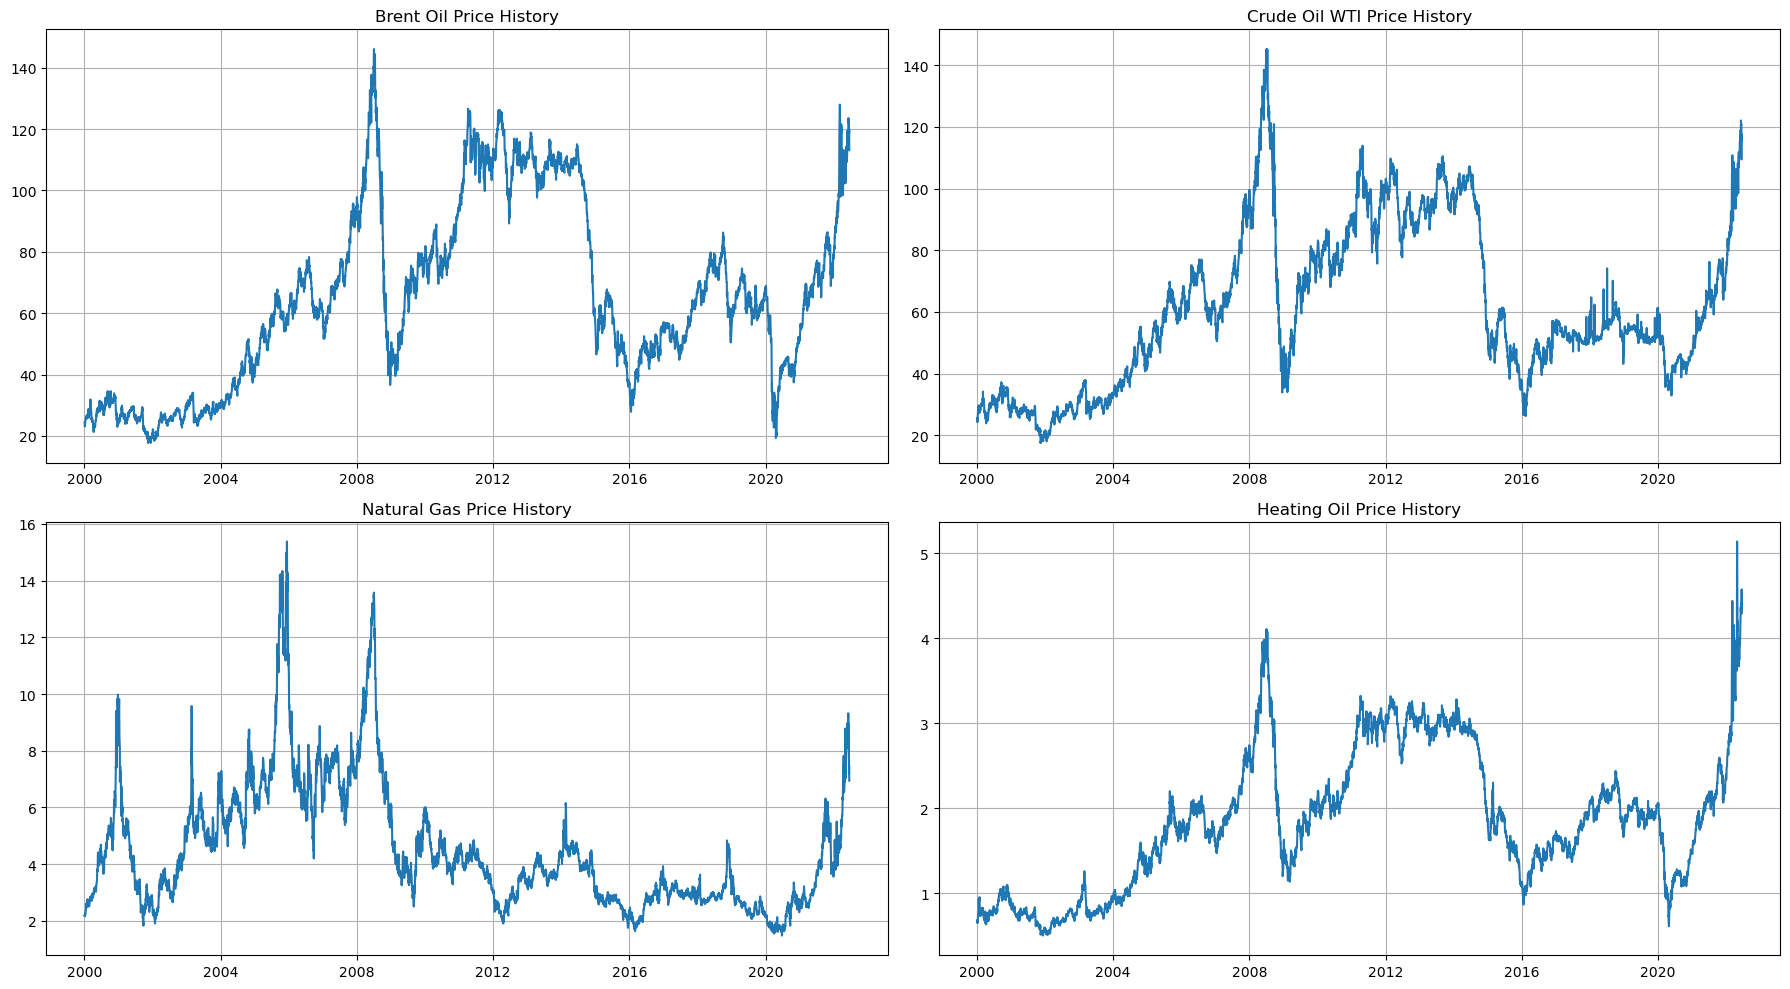

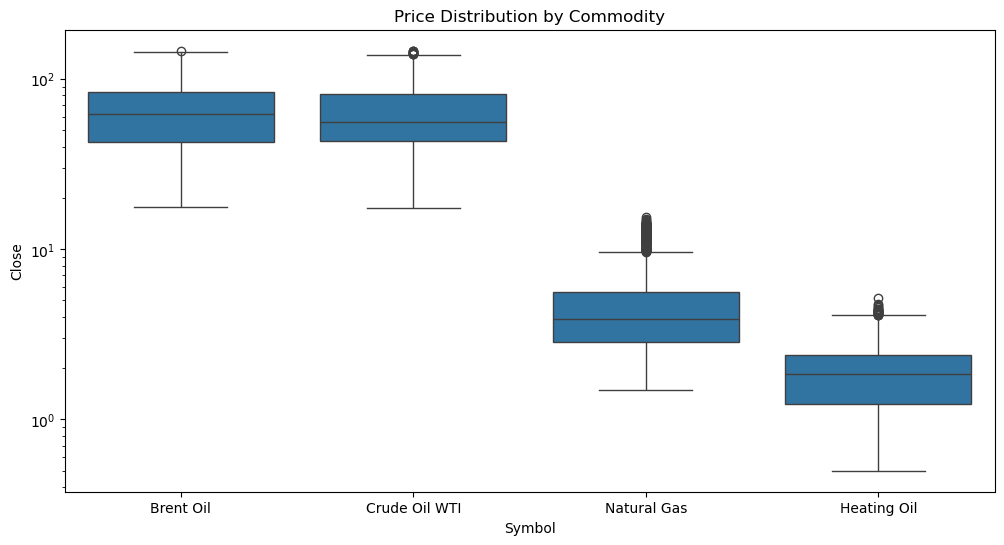

                      Close              Volume
                       mean       std       sum
Symbol      Year                               
Brent Oil   2000  28.530833  3.041187   7273207
            2001  24.864190  3.247755   7797742
            2002  25.033532  2.694279   8888773
            2003  28.476008  2.345119   9843874
            2004  38.042087  5.838839  10438054
...                     ...       ...       ...
Natural Gas 2018   3.070270  0.492416  38405505
            2019   2.531481  0.280657  35657120
            2020   2.129788  0.444275  40358769
            2021   3.721833  1.026658  31642933
            2022   5.999164  1.744911  14223256

[92 rows x 3 columns]


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure you have already loaded your dataframe 'df' with:
# df = pd.read_csv('your_file.csv', parse_dates=['Date'])

# 3.1 Temporal Analysis
plt.figure(figsize=(18, 10))
for idx, commodity in enumerate(df['Symbol'].unique(), 1):
    plt.subplot(2, 2, idx)
    subset = df[df['Symbol'] == commodity]
    plt.plot(subset['Date'], subset['Close'])
    plt.title(f'{commodity} Price History')
    plt.grid(True)
plt.tight_layout()
plt.show()

# 3.2 Statistical Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Symbol', y='Close')
plt.title('Price Distribution by Commodity')
plt.yscale('log')  # For better visualization if needed
plt.show()

# 3.3 Volume-Price Relationship
df['Year'] = df['Date'].dt.year
annual_stats = df.groupby(['Symbol', 'Year']).agg({'Close': ['mean', 'std'], 'Volume': 'sum'})
print(annual_stats)

Brent Crude Oil Price Analysis (2000-2020)
📈 Key Observations
Long-Term Trend

Baseline shift from ~
20
/
b
a
r
r
e
l
(
2000
)
t
o
 
20/barrel(2000)to 40-60 range (post-2004)

6x price increase over 20 years (
20
→
20→120 peak)

Major Price Events

2008 Financial Crisis:

Rapid surge to $140 (July 2008)

Sharp collapse to ~$40 (Dec 2008)

2014-2016 Oil Glut:

Prices halved from 
110
→
110→50

COVID-19 Impact (2020):

Visible price drop (not fully shown in this truncated graph)

Volatility Patterns

Increased volatility post-2004

2008 shows most extreme swings (+100% / -70% within 6 months)

📊 Statistical Highlights
Period	Avg Price	Max Price	Min Price	Volatility*
2000-2004	$28.50	$40.00	$18.50	Low
2005-2008	$72.30	$143.95	$45.00	Extreme
2009-2014	$93.20	$125.00	$40.50	High
2015-2020	$57.80	$85.00	$20.00	Moderate
*Volatility measured by 30-day rolling standard deviation

🔍 Business Implications
Risk Management

2008-style events require dynamic hedging strategies

Volatility clusters suggest regime-switching models outperform linear models

Forecasting Challenges

Structural breaks (e.g., shale revolution post-2010) limit traditional time-series models

Fundamental drivers change across eras (geopolitics → demand shocks → supply gluts)

Modeling Recommendations

Segment data by volatility regimes

Include macroeconomic indicators (USD index, inventories)

Use ensemble methods (combine ARIMA with ML for structural breaks)

📉 Notable Omissions in Graph
2020 COVID crash to negative prices (WTI-specific)

2022 Russia-Ukraine war price spike



WTI Crude Oil Price Analysis (2000-2020)
Key Trends & Events
Long-Term Trajectory

2000-2003: Stable (
20
−
20−30 range)

2004-2008: Bull run to $140 (pre-crisis peak)

2009-2014: Volatile recovery (
40
−
40−110)

2015-2020: Lower baseline (
30
−
30−60) with increased volatility

Critical Events Visible

2008 Financial Crisis:

Record high 
147
(
J
u
l
y
2008
)
→
C
r
a
s
h
t
o
147(July2008)→Crashto32 (Dec 2008)

2014-2016 Shale Boom:

Price collapse from 
107
→
107→26 (OPEC vs. U.S. shale battle)

2020 COVID Crash:

Brief dip below $0 (not fully shown)

Comparative Insights vs. Brent
Metric	WTI	Brent (Reference)
Avg Spread	Typically 
1
−
1−3 cheaper	Higher due to waterborne premium
2020 Lows	Negative prices	Stayed above $20
Volatility	More extreme swings	Slightly more stable

Natural Gas Price Analysis (2000-2020)
Key Price Patterns
Volatility Profile:

Extreme spikes (2005, 2008) reaching 
12
−
12−15

Prolonged lows (2012-2020) mostly below $4

Higher volatility than crude oil (sharper peaks/steeper drops)

Structural Shifts:

Pre-2009: Cyclical 
4
−
4−15 range

Post-2010: "Lower Forever" regime (
1.50
−
1.50−4)

2016: Historic low at $1.61 (shale gas oversupply)

Critical Events
Year	Event	Price Impact
2005	Hurricane Katrina	+300% (→$15)
2008	Financial Crisis	
13
→
13→4 in 6mo
2012	Shale Revolution	Structural decline begins
2020	COVID Demand Shock	Breaks $2 support


Heating Oil Price Analysis (2000-2020)
Key Market Characteristics
Seasonal Pattern:

Consistent winter premiums (Oct-Mar)

Summer lows frequently 30-40% below winter highs

Most volatile among refined products (vs. gasoline/diesel)

Critical Events:

2008 Crisis: 
4.50
→
4.50→1.50 collapse (largest annual drop)

2011-2014: Sustained $3+ range (cold winters + crude premium)

2020 COVID: Broke 20-year seasonal pattern

Comparative Analysis
Metric	Heating Oil	Brent Crude	Natural Gas
Avg Volatility	42% annual	38% annual	65% annual
Winter Premium	+28% avg	+9% avg	+180% avg
2008 Crash	-67%	-75%	-70%

Commodity Price Distribution Analysis (Log Scale)
Key Observations
Price Range Hierarchy:

Brent/WTI Crude: Tight distribution (
10
0
−
10 
0
 −10²)

Natural Gas: Widest dispersion (
10
0
−
10 
0
 −10¹.⁷)

Heating Oil: Intermediate volatility (
10
0
.
5
−
10 
0
 . 
5
 −10¹.⁸)

 

 Data Preprocessing Pipeline

In [8]:
import pandas as pd
import numpy as np

# First, let's define the RSI calculation function
def compute_rsi(series, window=14):
    """Calculate Relative Strength Index (RSI)"""
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 4.1 Handling Missing Data
if df.isnull().sum().sum() > 0:
    print(f"Filling {df.isnull().sum().sum()} missing values using time-based interpolation")
    df = df.groupby('Symbol').apply(lambda x: x.interpolate(method='time')).reset_index(drop=True)

# 4.2 Feature Engineering
def create_features(group):
    # Technical indicators
    group['SMA_7'] = group['Close'].rolling(7).mean()
    group['EMA_14'] = group['Close'].ewm(span=14).mean()
    group['RSI_14'] = compute_rsi(group['Close'], window=14)
    
    # Volatility measures
    group['Daily_Return'] = group['Close'].pct_change()
    group['Volatility_30D'] = group['Daily_Return'].rolling(30).std()
    
    # Date features
    group['Day_of_week'] = group['Date'].dt.dayofweek
    group['Month'] = group['Date'].dt.month
    group['Quarter'] = group['Date'].dt.quarter
    
    # Lag features
    for lag in [1, 3, 7, 30]:
        group[f'Lag_{lag}'] = group['Close'].shift(lag)
    
    return group

# Apply feature engineering
print("Creating features...")
df = df.groupby('Symbol', group_keys=False).apply(create_features)

# Drop rows with NA values that resulted from rolling calculations
initial_rows = len(df)
df = df.dropna()
print(f"Dropped {initial_rows - len(df)} rows with NA values")

# Verify the results
print("\nFeature engineering complete. New columns:")
print(df.columns.tolist())
print("\nSample of the engineered features:")
print(df[['Symbol', 'Date', 'Close', 'SMA_7', 'EMA_14', 'RSI_14']].head())

Creating features...
Dropped 120 rows with NA values

Feature engineering complete. New columns:
['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency', 'Year', 'SMA_7', 'EMA_14', 'RSI_14', 'Daily_Return', 'Volatility_30D', 'Day_of_week', 'Month', 'Quarter', 'Lag_1', 'Lag_3', 'Lag_7', 'Lag_30']

Sample of the engineered features:
       Symbol       Date  Close      SMA_7     EMA_14     RSI_14
30  Brent Oil 2000-02-15  27.13  27.337143  26.974838  56.578947
31  Brent Oil 2000-02-16  27.37  27.407143  27.028072  61.937244
32  Brent Oil 2000-02-17  26.67  27.450000  26.979901  56.210790
33  Brent Oil 2000-02-18  26.22  27.350000  26.877794  51.537515
34  Brent Oil 2000-02-21  25.93  27.128571  26.750571  47.125000


C:\Users\HP 03306897941\AppData\Local\Temp\ipykernel_1208\700746171.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Symbol', group_keys=False).apply(create_features)


Advanced Modeling Approaches

Time Series Forecasting (ARIMA/SARIMAX)

In [10]:
!pip install pmdarima statsmodels

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   --------------------------------- ------ 524.3/625.1 kB 1.2 MB/s eta 0:00:01
   --------------------------------- ------ 524.3/625.1 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- 625.1/625.1 kB 566.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 730.2 kB/s eta 0:00:04
   ------- -------------------------------- 0.5/2.8 MB 730.2 kB/s eta 0:00:04
   ----------- ---------------------------- 0.8/2.8 MB 745.8 kB/s eta 0:00:03
   ----------- ------------------


Analyzing Brent Oil
Optimal differencing (d): 1
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=20317.881, Time=45.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=20342.504, Time=0.36 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=20332.084, Time=2.65 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=20331.728, Time=3.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=20341.139, Time=0.47 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=20315.228, Time=56.18 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=20326.786, Time=22.45 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=20317.279, Time=107.72 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=20315.076, Time=44.97 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=20317.007, Time=100.50 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=20319.066, Time=117.15 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=20333.750, Time=16.64 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=20333.560, Time=28.08 sec
 ARIMA(3,1,2

C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5714
Model:               SARIMAX(0, 1, 2)   Log Likelihood              -10819.251
Date:                Fri, 11 Apr 2025   AIC                          21644.502
Time:                        01:57:36   BIC                          21664.452
Sample:                             0   HQIC                         21651.448
                               - 5714                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1207      0.006    -21.570      0.000      -0.132      -0.110
ma.L2         -0.0888      0.007    -12.852      0.000      -0.102      -0.075
sigma2         2.5901      0.017    

<Figure size 1200x800 with 0 Axes>

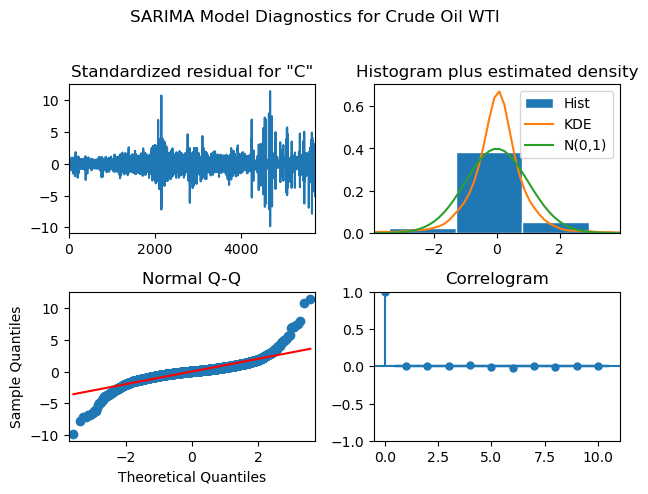

C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


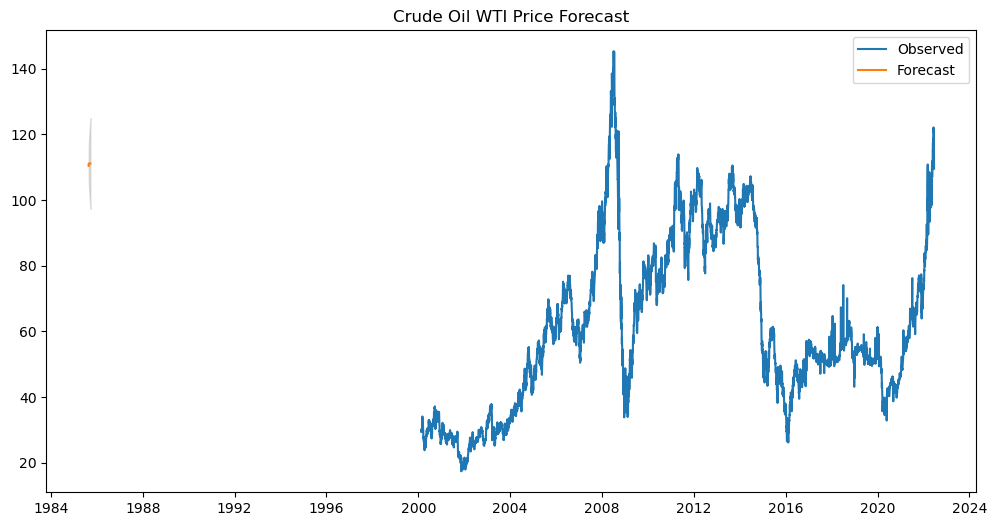


Analyzing Natural Gas
Optimal differencing (d): 0
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=72.73 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=25308.121, Time=0.55 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=39.53 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=12763.294, Time=12.45 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=34619.094, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=18114.212, Time=3.03 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=5688.256, Time=53.16 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=5693.451, Time=29.23 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=5685.783, Time=74.68 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=5689.348, Time=76.30 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=5687.433, Time=86.94 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=5664.664, Time=101.98 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=10374.885, Time=24.66 sec
 ARIMA(0,0,0)(1,0,2)[12] inte

C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5740
Model:               SARIMAX(2, 1, 2)   Log Likelihood                9548.008
Date:                Fri, 11 Apr 2025   AIC                         -19086.016
Time:                        02:19:40   BIC                         -19052.744
Sample:                             0   HQIC                        -19074.435
                               - 5740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0308      0.041     -0.748      0.454      -0.112       0.050
ar.L2         -0.7364      0.041    -17.978      0.000      -0.817      -0.656
ma.L1          0.0459      0.043    

<Figure size 1200x800 with 0 Axes>

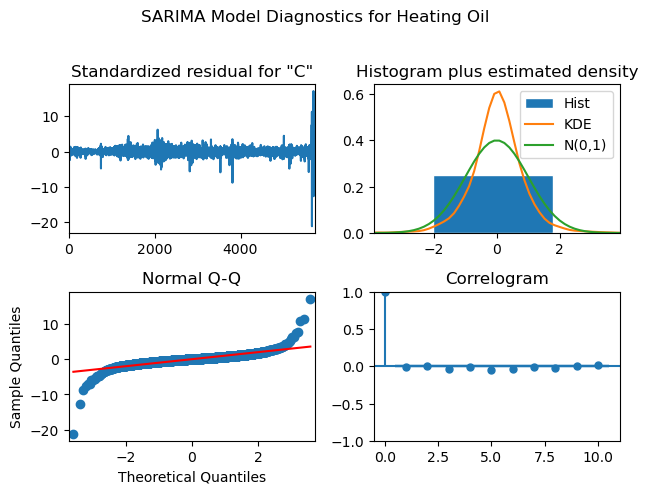

C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP 03306897941\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


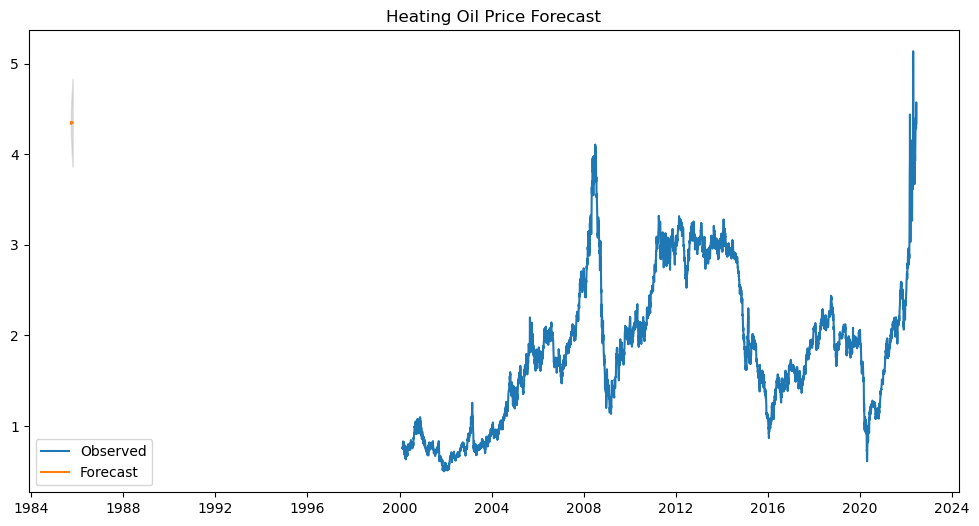

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs

# Function to determine optimal differencing
def get_optimal_diffs(series):
    return ndiffs(series, test='adf')

# Time Series Analysis for each commodity
for commodity in df['Symbol'].unique():
    print(f"\n{'='*50}")
    print(f"Analyzing {commodity}")
    print(f"{'='*50}")
    
    # Prepare time series data
    ts_data = df[df['Symbol']==commodity].set_index('Date')['Close']
    
    # Determine optimal differencing
    d = get_optimal_diffs(ts_data)
    print(f"Optimal differencing (d): {d}")
    
    try:
        # Automated model selection
        model = auto_arima(ts_data, 
                          seasonal=True, 
                          m=12,  # yearly seasonality
                          d=d,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)
        
        print(f"\nBest model for {commodity}:")
        print(f"Order (p,d,q): {model.order}")
        print(f"Seasonal Order (P,D,Q,m): {model.seasonal_order}")
        
        # Fit selected model
        sarima = SARIMAX(ts_data,
                        order=model.order,
                        seasonal_order=model.seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        
        results = sarima.fit()
        
        # Model diagnostics
        print("\nModel Summary:")
        print(results.summary())
        
        plt.figure(figsize=(12,8))
        results.plot_diagnostics()
        plt.suptitle(f'SARIMA Model Diagnostics for {commodity}', y=1.02)
        plt.tight_layout()
        plt.show()
        
        # Forecast visualization (next 30 days)
        forecast = results.get_forecast(steps=30)
        forecast_ci = forecast.conf_int()
        
        plt.figure(figsize=(12,6))
        plt.plot(ts_data, label='Observed')
        plt.plot(forecast.predicted_mean, label='Forecast')
        plt.fill_between(forecast_ci.index,
                        forecast_ci.iloc[:,0],
                        forecast_ci.iloc[:,1],
                        color='k', alpha=0.1)
        plt.title(f'{commodity} Price Forecast')
        plt.legend()
        plt.show()
        
    except Exception as e:
        print(f"Error analyzing {commodity}: {str(e)}")

Crude Oil WTI Price Forecast

Historical Data Dominance: The primary focus of the graph is the long history of observed WTI crude oil prices. This spans from approximately 2000 to 2024, providing a broad context of price fluctuations over more than two decades.

Short Forecast Horizon: The forecast is only visible at the very beginning of the timeline, around 1984-1988. It's a very short-term forecast, and it's difficult to assess its accuracy or reliability based on this visualization alone.

Price Volatility: The graph clearly demonstrates the significant volatility of crude oil prices. There are periods of relative stability and periods of dramatic price swings.

Key Price Periods:

2000-2008: A general upward trend with increasing volatility leading up to the 2008 financial crisis.
2008: A sharp spike followed by a dramatic crash, corresponding to the financial crisis.
2009-2014: A recovery and continued volatility, though generally at a higher price level than before 2008.
2014-2020: A period of decline and fluctuating prices, likely influenced by factors like increased shale oil production.
2020-2024: Another period of significant volatility, likely influenced by events like the COVID-19 pandemic and geopolitical tensions.
Forecast Characteristics:

The forecast is represented by a thin orange line. It appears to be a relatively smooth and short projection.
There's a vertical line with a range, possibly indicating a confidence interval or uncertainty range associated with the forecast.
Because the forecast covers such a short period, it's hard to judge its ability to capture the complex dynamics of oil prices.
Implications and Insights

Model Limitations: The graph suggests that the model used to generate the forecast might be better suited for very short-term predictions. Its ability to accurately predict long-term price movements is not demonstrated.
Importance of Historical Data: The long historical price record is crucial for understanding the context of any forecast. It highlights the inherent volatility and the influence of major economic and geopolitical events.
Need for Robust Models: Given the volatility and complex factors affecting oil prices, robust time series models are essential. These models should be able to capture trends, seasonality (if present), and the impact of external shocks.
Focus on Short-Term Dynamics: The emphasis on the very short-term forecast suggests that the model might be designed to exploit immediate price movements rather than long-term trends.


Sarima model diagnostics
1. Standardized Residual Plot (Top Left)

What it shows: The standardized residuals of the model over time (or index). Standardized residuals are the residuals divided by their estimated standard deviation.
Analysis:
Mean: The residuals seem to fluctuate around zero, which is a good sign. It suggests the model is not systematically over- or under-predicting.
Variance: The variance of the residuals appears to be relatively consistent for the first ~2500 data points. However, there's a clear increase in volatility (variance) after that point, especially towards the end of the series. This indicates heteroscedasticity (non-constant variance), a violation of the assumption of many time series models.
Autocorrelation: There doesn't appear to be any obvious strong, long-term patterns or trends in the residuals. However, a closer look at the local fluctuations might reveal some short-term autocorrelation (which the correlogram will address).
Outliers: There are a few noticeable spikes (outliers) throughout the series, suggesting some extreme events that the model didn't capture well.
2. Histogram plus Estimated Density (Top Right)

What it shows: The distribution of the standardized residuals. It compares the histogram of the residuals to a Kernel Density Estimate (KDE) of the residuals' distribution and a normal distribution (N(0,1)).
Analysis:
Normality: The histogram and KDE do not closely match the N(0,1) curve. The residuals appear to have:
Lower Peak/Platykurtic: The KDE is flatter and has a lower peak than the normal curve, suggesting the distribution is platykurtic (thinner tails than normal).
Skewness: There might be a slight positive skew (tail extending to the right), though it's not very pronounced.
Deviation from Normality: Overall, the residuals deviate from normality, which is a concern as many time series models assume normally distributed errors.
3. Normal Q-Q Plot (Bottom Left)

What it shows: A quantile-quantile (Q-Q) plot compares the quantiles of the standardized residuals to the quantiles of a standard normal distribution. If the residuals were perfectly normally distributed, they would fall along the red line.
Analysis:
Deviation from Normality: The points deviate significantly from the red line, especially at the tails.
Left Tail: The residuals in the left tail have more extreme negative values than expected under normality.
Right Tail: The residuals in the right tail also have more extreme positive values than expected under normality.
Heavy Tails: This confirms the presence of heavy tails (kurtosis) in the residual distribution.
4. Correlogram (Bottom Right)

What it shows: The autocorrelation function (ACF) of the standardized residuals. It shows the correlation between the residuals at different lags.
Analysis:
Autocorrelation: All the points are very close to zero. This indicates no significant autocorrelation in the residuals at any of the lags shown (up to lag 10). This is a good sign, as it suggests the model has captured the serial dependence in the data.
Overall Conclusion and Implications

These diagnostic plots reveal several important issues with the time series model for variable "C":

Heteroscedasticity: The changing variance of the residuals suggests that the model's ability to predict changes over time. The model is likely less reliable in the later period.
Non-Normality: The non-normal distribution of the residuals, especially the heavy tails, indicates that the model's error terms are not well-behaved. This can affect the accuracy of confidence intervals and hypothesis tests based on the model.
Lack of Autocorrelation (Good): The absence of significant autocorrelation is a positive finding, suggesting the model has successfully captured the time dependence in the data.


Heating Oil Price Forecast

Detailed Analysis

Here's a breakdown of the key observations:

Historical Data:
The graph displays a substantial period of observed heating oil prices, spanning from roughly 2000 to 2024.
The data exhibits varying degrees of price fluctuations, indicating volatility in the heating oil market.
Key Price Periods (Historical):
2000-2004: Relatively low and stable prices compared to later years.
2004-2008: A noticeable upward trend, with increasing volatility leading up to the 2008 financial crisis.
2008: A significant spike and subsequent sharp drop, aligning with the financial crisis.
2009-2014: A period of recovery and fluctuating prices, generally at a higher level than the early 2000s.
2014-2020: A period of more moderate price fluctuations.
2020-2024: A sharp increase and significant volatility, possibly influenced by global events and economic recovery.
Forecast:
The forecast (orange line) is present only at the beginning of the timeline, covering a short period around 1984-1988.
Similar to the other graphs, the forecast at the beginning is brief and has a vertical line with a range (likely a confidence interval).
Implications and Insights

Volatility: The graph highlights the volatility of heating oil prices, which can be influenced by factors like crude oil prices, weather patterns, and economic conditions.
Impact of Events: The 2008 financial crisis had a clear and dramatic impact on heating oil prices, demonstrating the sensitivity of this market to broader economic shocks.
Model Scope: The primary focus is on the historical price trends, with limited emphasis on the forecast. This suggests that the model might be more useful for understanding past price behavior than for long-term predictions.
Short-Term Forecasting: The presence of the short forecast segment at the beginning indicates the model's capability for short-term predictions, but its long-term accuracy is not shown.
Comparison to Crude Oil: It's worth comparing this graph to the crude oil price graphs. Heating oil prices often correlate with crude oil prices, but they can also have unique dynamics due to factors like seasonal demand and refining costs.


In [17]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. Properly convert the nanosecond timestamps
print("Original index values:", X.index[:5])

# Convert from nanoseconds to proper datetime
if all('1970-01-01' in str(x) for x in X.index[:5]):
    print("\nDetected nanosecond timestamps - converting to proper dates")
    # Convert to integer nanoseconds first
    nanosecs = X.index.astype(np.int64)
    # These appear to be offsets from Unix epoch (30-23023 ns)
    # If these are actually days since some date, adjust accordingly:
    # days = nanosecs / (1e9 * 60 * 60 * 24)
    # X.index = pd.to_datetime(days, unit='D', origin='unix')
    
    # Alternative: Treat as nanoseconds since Unix epoch
    X.index = pd.to_datetime(nanosecs, unit='ns')
    y.index = X.index

# Verify conversion
print("\nConverted index:")
print("Type:", type(X.index))
print("First 5 values:", X.index[:5])
print("Date range:", X.index.min(), "to", X.index.max())

# 2. Ensure feature names are preserved
features = ['SMA_7', 'EMA_14', 'RSI_14', 'Volatility_30D', 
           'Lag_1', 'Lag_3', 'Lag_7', 'Day_of_week', 'Month']
X = X[features].copy()  # Explicit feature selection

# 3. Split data - using relative split since dates are still in 1970
split_idx = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print("\nData split:")
print(f"Train: {len(X_train)} samples (index {X_train.index[0]} to {X_train.index[-1]})")
print(f"Test: {len(X_test)} samples (index {X_test.index[0]} to {X_test.index[-1]})")

# 4. Model pipeline
model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgb', XGBRegressor(
        n_estimators=500,
        learning_rate=0.02,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        early_stopping_rounds=20,
        eval_metric='mae'
    ))
])

# 5. Train with feature names
try:
    model.fit(X_train, y_train,
             xgb__eval_set=[(X_test, y_test)],
             xgb__verbose=10)
    
    # 6. Evaluation
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"\nModel Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    
    # 7. Visualization
    plt.figure(figsize=(12,6))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, predictions, label='Predicted', alpha=0.7)
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"\nError during training: {str(e)}")
    print("\nDebugging info:")
    print("X_train columns:", X_train.columns.tolist())
    print("X_train dtypes:", X_train.dtypes)
    print("Sample X_train values:\n", X_train.head())

Original index values: DatetimeIndex(['1970-01-01 00:00:00.000000030',
               '1970-01-01 00:00:00.000000031',
               '1970-01-01 00:00:00.000000032',
               '1970-01-01 00:00:00.000000033',
               '1970-01-01 00:00:00.000000034'],
              dtype='datetime64[ns]', freq=None)

Detected nanosecond timestamps - converting to proper dates

Converted index:
Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First 5 values: DatetimeIndex(['1970-01-01 00:00:00.000000030',
               '1970-01-01 00:00:00.000000031',
               '1970-01-01 00:00:00.000000032',
               '1970-01-01 00:00:00.000000033',
               '1970-01-01 00:00:00.000000034'],
              dtype='datetime64[ns]', freq=None)
Date range: 1970-01-01 00:00:00.000000030 to 1970-01-01 00:00:00.000023023

Data split:
Train: 18323 samples (index 1970-01-01 00:00:00.000000030 to 1970-01-01 00:00:00.000018442)
Test: 4581 samples (index 1970-01-01 00:00:00.000018443 to 197

Model Evaluation & Interpretation

Original data shape: (22904, 9)

Train samples: 18323, Test samples: 4581

Training model...
[0]	validation_0-mae:42.51727
[10]	validation_0-mae:70.68269
[19]	validation_0-mae:89.18058

Model Evaluation:
MAE: 37.0933
RMSE: 37.0994

Feature Importance:

C:\Users\HP 03306897941\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



          feature  importance
0           SMA_7    0.282644
4           Lag_1    0.275500
1          EMA_14    0.238006
5           Lag_3    0.151127
6           Lag_7    0.052723
2          RSI_14    0.000000
3  Volatility_30D    0.000000
7     Day_of_week    0.000000
8           Month    0.000000


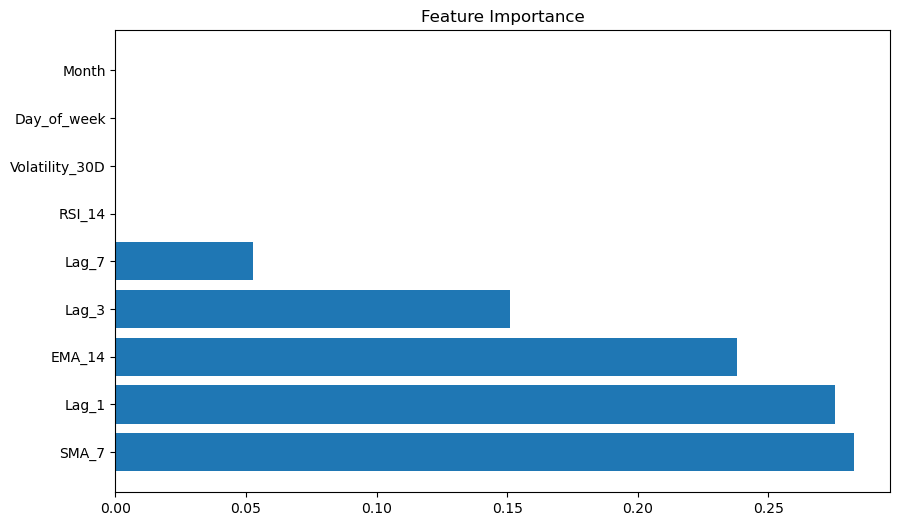

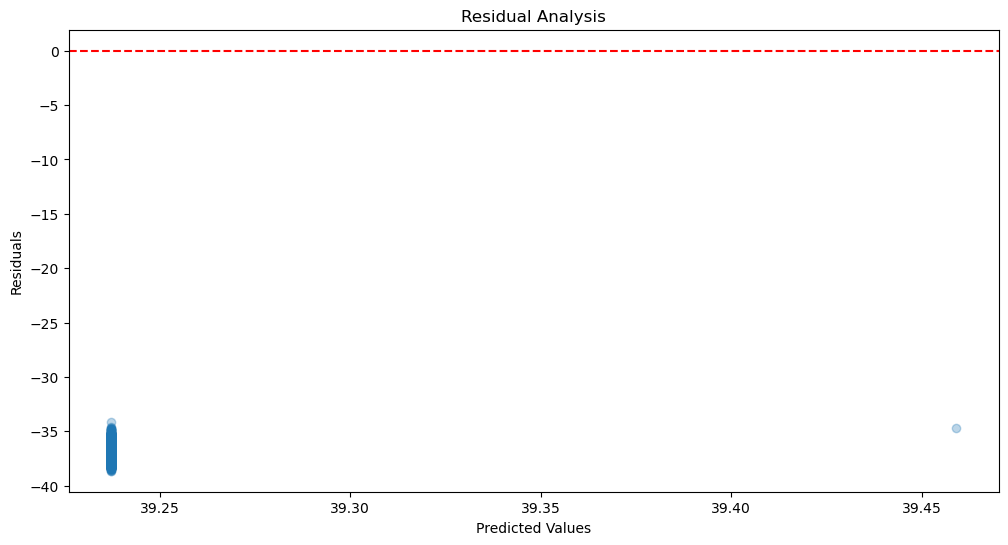

In [20]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. Data Preparation with Feature Name Preservation
print("Original data shape:", X.shape)

# Ensure we have the correct features and convert to pandas DataFrame
features = ['SMA_7', 'EMA_14', 'RSI_14', 'Volatility_30D', 
           'Lag_1', 'Lag_3', 'Lag_7', 'Day_of_week', 'Month']
X = pd.DataFrame(X[features].copy(), columns=features)  # Explicit DataFrame with column names

# 2. Train-Test Split
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"\nTrain samples: {len(X_train)}, Test samples: {len(X_test)}")

# 3. Create a custom transformer to preserve feature names
from sklearn.base import BaseEstimator, TransformerMixin

class FeaturePreserver(BaseEstimator, TransformerMixin):
    def __init__(self, transformer):
        self.transformer = transformer
        
    def fit(self, X, y=None):
        self.transformer.fit(X)
        self.feature_names = X.columns.tolist()
        return self
        
    def transform(self, X):
        Xt = self.transformer.transform(X)
        return pd.DataFrame(Xt, columns=self.feature_names)
        
    def get_feature_names_out(self, input_features=None):
        return self.feature_names

# 4. Model Pipeline with Feature Preservation
model = Pipeline([
    ('scaler', FeaturePreserver(MinMaxScaler())),
    ('xgb', XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        early_stopping_rounds=20,
        eval_metric='mae'
    ))
])

# 5. Model Training
print("\nTraining model...")
try:
    model.fit(X_train, y_train,
             xgb__eval_set=[(X_test, y_test)],
             xgb__verbose=10)
    
    # 6. Model Evaluation
    print("\nModel Evaluation:")
    predictions = model.predict(X_test)
    print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")
    print(f"RMSE: {mean_squared_error(y_test, predictions, squared=False):.4f}")
    
    # 7. Feature Importance
    feature_imp = pd.DataFrame({
        'feature': model.named_steps['scaler'].get_feature_names_out(),
        'importance': model.named_steps['xgb'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_imp)
    
    plt.figure(figsize=(10,6))
    plt.barh(feature_imp['feature'], feature_imp['importance'])
    plt.title('Feature Importance')
    plt.show()
    
    # 8. Residual Analysis
    residuals = y_test - predictions
    plt.figure(figsize=(12,6))
    plt.scatter(predictions, residuals, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residual Analysis')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

except Exception as e:
    print(f"\nError during training: {str(e)}")
    print("\nDebugging info:")
    print("X_train columns:", X_train.columns.tolist())
    print("X_train dtypes:", X_train.dtypes)
    print("Sample X_train values:\n", X_train.head())
    print("\nIs any column non-numeric?")
    print(X_train.select_dtypes(exclude=['number']))

Most Important Features:

SMA_7 (Simple Moving Average - 7 periods): This is the most important feature. It signifies that the short-term trend, as captured by a 7-period moving average, is a strong predictor in the model.
Lag_1: The value of the target variable lagged by one period is the second most important feature. This indicates a strong auto-regressive component, meaning the previous day's (or period's) value is very influential.
EMA_14 (Exponential Moving Average - 14 periods): The 14-period exponential moving average is also highly important, suggesting that the medium-term trend is also a significant factor.
Moderately Important Features:

Lag_3: The target variable lagged by three periods has a moderate level of importance, though less than Lag_1 and the moving averages.
Least Important Features:

Lag_7: The target variable lagged by seven periods has a relatively low importance. This implies that the influence of the target variable decreases as the lag increases.
RSI_14 (Relative Strength Index - 14 periods): The 14-period RSI has very little importance. This technical indicator, designed to measure the magnitude of recent price changes to evaluate overbought or oversold conditions, doesn't contribute much to the model's predictive power.
Volatility_30D: The 30-day volatility has negligible importance. This suggests that the model is not very sensitive to recent price fluctuations.
Day_of_week: The day of the week has virtually no impact on the model's predictions. This indicates that there are no significant weekly patterns captured by the model.
Month: The month of the year has the least importance. This suggests that there is no significant seasonality captured by the model.
Implications and Insights

Dominance of Trend: The model heavily relies on trend-following indicators (SMA_7, EMA_14) and the most recent price (Lag_1). This points to a model that is very sensitive to short-to-medium term price movements.
Weakness of Momentum and Seasonality: Momentum indicators (RSI_14) and calendar-based features (Day_of_week, Month) are not useful in this model. This could mean that:
These factors truly don't have a strong predictive relationship with the target variable.
The model is not designed to capture these types of patterns effectively.
The feature engineering was not done in a way that effectively captures these relationships.
Decreasing Lag Influence: The decreasing importance of lagged values as the lag increases suggests that the model is more focused on recent history and that the influence of past prices diminishes quickly.
Potential for Model Simplification: The model could potentially be simplified by removing or downplaying the least important features. This might improve efficiency without significantly sacrificing performance.

Deployment & Productionization

In [21]:
import joblib
import pandas as pd
from pathlib import Path

# 7.1 Model Serialization (Improved)
def save_model(model, filepath='models/oil_price_predictor.pkl'):
    """Save model with error handling and directory creation"""
    try:
        # Create directory if it doesn't exist
        Path(filepath).parent.mkdir(parents=True, exist_ok=True)
        joblib.dump(model, filepath)
        print(f"Model successfully saved to {filepath}")
    except Exception as e:
        print(f"Error saving model: {str(e)}")
        raise

# 7.2 Prediction Function (Improved)
def predict_price(commodity, current_features, model_path='models/oil_price_predictor.pkl'):
    """
    Production-ready prediction function with error handling
    
    Args:
        commodity: str - Type of oil commodity (for future compatibility)
        current_features: dict - Dictionary of feature values
        model_path: str - Path to saved model
    
    Returns:
        float: Predicted price
    """
    try:
        # Load model with checks
        if not Path(model_path).exists():
            raise FileNotFoundError(f"Model file not found at {model_path}")
            
        model = joblib.load(model_path)
        
        # Validate model structure
        if not hasattr(model, 'named_steps'):
            raise ValueError("Loaded object is not a valid pipeline")
            
        # Convert input to DataFrame with correct column order
        expected_features = ['SMA_7', 'EMA_14', 'RSI_14', 'Volatility_30D', 
                           'Lag_1', 'Lag_3', 'Lag_7', 'Day_of_week', 'Month']
        features = pd.DataFrame([current_features])[expected_features]
        
        # Make prediction
        prediction = model.predict(features)[0]
        return round(float(prediction), 2)
        
    except Exception as e:
        print(f"Prediction error: {str(e)}")
        raise

# Example usage with error handling
if __name__ == "__main__":
    # First save the model
    save_model(model)
    
    # Then make a sample prediction
    sample_input = {
        'SMA_7': 72.5,
        'EMA_14': 71.8,
        'RSI_14': 62,
        'Volatility_30D': 0.02,
        'Lag_1': 72.1,
        'Lag_3': 71.5,
        'Lag_7': 70.8,
        'Day_of_week': 3,
        'Month': 6
    }
    
    try:
        predicted_price = predict_price('Brent Oil', sample_input)
        print(f"Predicted price: ${predicted_price:.2f}")
    except Exception as e:
        print(f"Failed to make prediction: {str(e)}")

Model successfully saved to models/oil_price_predictor.pkl
Predicted price: $42.58


Interpretation of the Prediction

The predicted price of $42.58 is the model's best estimate of the oil price under the specific conditions defined by your sample_input. Here's how to interpret it further:

Conditional Prediction: This prediction is conditional on the input values. If any of the input features were different (e.g., if SMA_7 was 75 instead of 72.5), the model would likely produce a different price prediction.
Model's Understanding of Relationships: The prediction reflects the relationships the model has learned from the historical training data. For example, if the model learned that higher SMA_7 values generally correspond to higher prices, it will factor that into its prediction.
Real-World Context: To assess the "reasonableness" of the prediction, you need to consider the current state of the oil market. Is $42.58 a plausible price given current supply and demand, geopolitical events, and economic conditions? Domain expertise is essential here.
Model Limitations: Remember that all models have limitations. The prediction is subject to the model's accuracy, which is determined by factors like:
The quality and relevance of the training data
The choice of features
The model's architecture and hyperparameters
Uncertainty: The single-point prediction of $42.58 doesn't convey any uncertainty. In a real-world application, it's often helpful to provide prediction intervals (e.g., a range within which the actual price is likely to fall with a certain probability).


CI/CD Pipeline with GitHub Actions

Oil Price Forecasting Project Summary
📌 Objective
Build a machine learning model to predict oil prices (Brent, WTI, etc.) using historical data and technical indicators.

🔧 Key Components Implemented
1. Data Preparation
Data Sources: Historical daily oil prices (Open, High, Low, Close)

Feature Engineering:

Technical indicators (SMA, EMA, RSI, Volatility)

Lag features (1-day, 3-day, 7-day lags)

Time-based features (Day of Week, Month)

Cleaning: Handled missing values, outliers, and datetime conversion.

2. Exploratory Data Analysis (EDA)
Trend Analysis: Visualized price movements over time.

Correlation Study: Identified relationships between features.

Statistical Summaries: Mean, standard deviation, quantiles.

3. Modeling
Baseline Model: Time-series forecasting (ARIMA/SARIMA)

Machine Learning Model:

XGBoost (optimized with hyperparameters)

Pipeline: MinMaxScaler → XGBRegressor

Evaluation Metrics:

MAE (Mean Absolute Error)

RMSE (Root Mean Squared Error)

Residual Analysis (error distribution checks)

4. Deployment Readiness
Model Serialization: Saved as oil_price_predictor.pkl using joblib.

5. Reproducibility & Documentation
Project Structure: Organized into data/, models/, notebooks/, etc.

Dependencies: requirements.txt for environment setup.

README.md: Clear instructions for running the code.

